### Results and Plots

#### Call data from Database, merge and plot

Import and config

In [1]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr

#### Load database

In [2]:
# load dune data
save_path = "/home/realist/projects/whale-vs-price/database/dune_api_data.joblib"
df_dune = joblib.load(save_path)

# load coingecko data
file_path = "/home/realist/projects/whale-vs-price/database/coingecko_data.joblib"
df_coingecko = joblib.load(file_path)

print(df_coingecko.head())
print(df_dune.head())

    timestamp     price
0  2025-07-10  0.380202
1  2025-07-11  0.413512
2  2025-07-12  0.399212
3  2025-07-13  0.410277
4  2025-07-14  0.415686
    timestamp        amount  transaction  whales
0  2025-07-10  1.502546e+07           44      27
1  2025-07-11  7.382927e+07          187      89
2  2025-07-12  2.941678e+07           86      40
3  2025-07-13  3.846587e+07           92      40
4  2025-07-14  5.923004e+07          158      67


#### Merge data

In [3]:
# Merge the two DataFrames on the 'timestamp' column
df = pd.merge(df_dune, df_coingecko, on= 'timestamp', how= 'inner')

df.head()

,timestamp,amount,transaction,whales,price
0,2025-07-10,1.502546e+07,44,27,0.380202
1,2025-07-11,7.382927e+07,187,89,0.413512
2,2025-07-12,2.941678e+07,86,40,0.399212
3,2025-07-13,3.846587e+07,92,40,0.410277
4,2025-07-14,5.923004e+07,158,67,0.415686


### Plot comparing whale transaction and its effect on prices

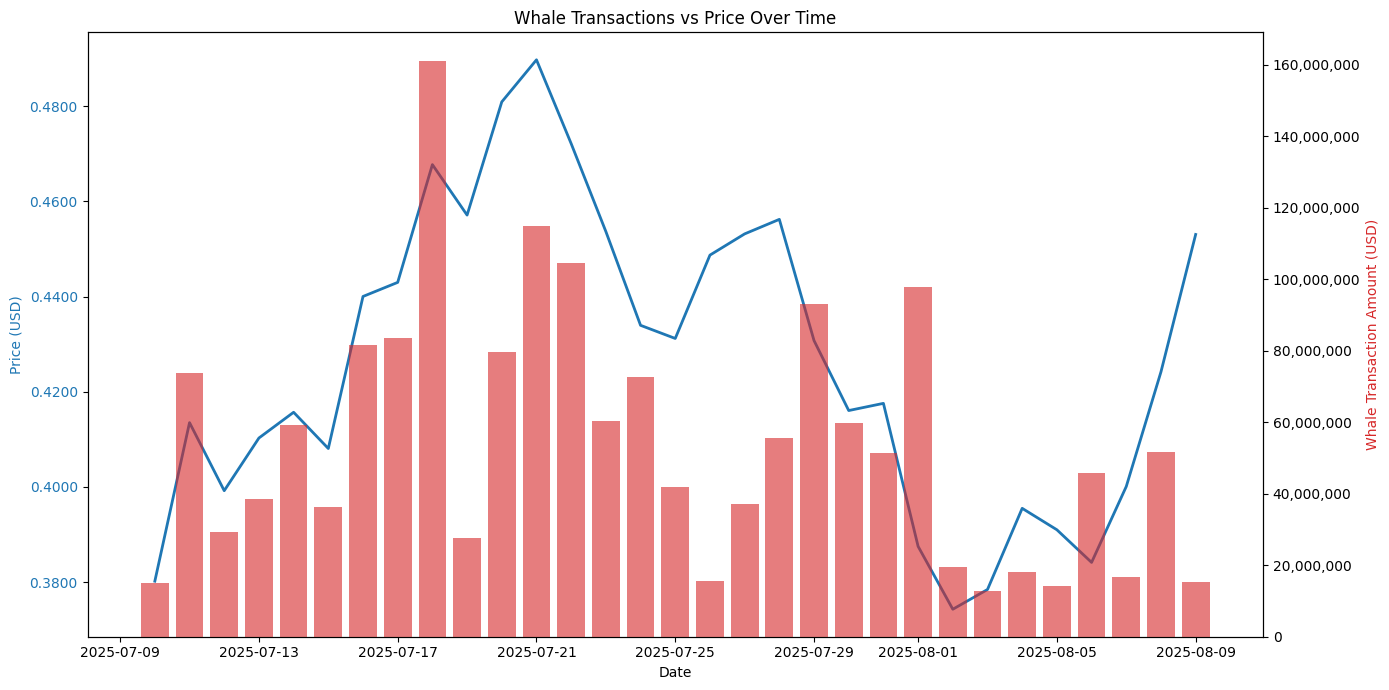

In [4]:
# sort the DataFrame by timestamp
df.sort_values(by='timestamp', inplace=True)

#set up the figure and two y-axis
fig, ax1 = plt.subplots(figsize=(14, 7))

# plot price on the left y-axis and date on x-axis
ax1.plot(df['timestamp'], df['price'], color='tab:blue', linewidth=2)
ax1.set_xlabel('Date')
ax1.set_ylabel('Price (USD)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# set up righty axis
ax2 = ax1.twinx()
ax2.set_ylabel('Whale Transaction Amount (USD)', color='tab:red')

# plot whale transaction amount on the right y-axis as bar
ax2.bar(df['timestamp'], df['amount'], color='tab:red', alpha=0.6, label='Whale Transaction Amount (USD)')

# format y-axis with full numbers
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.4f}'))

plt.title('Whale Transactions vs Price Over Time')
fig.tight_layout()  # adjust layout to prevent overlap

# show the plot
plt.show()


#### Analyzing the correlation between whale transacation and price change using Pearson's correlation

In [ ]:
# calculate daily percent price change
df['price_change'] = df['price'].pct_change() * 100

# clean data by drop NA values and create a new dataframe
df_new =df[['amount','price_change']].dropna()

# calculate pearson correlation
corr, pval = pearsonr(df_new['amount'], df_new['price_change'])

# interpret the result
if pval < 0.05:
    print("There is a significant correlation")
else:
    print("There is no significant correlation")

print("correlation", corr)
print("p-value", pval)

# the pearson correlation (corr) coefficient measures the linear relationship between two variables
# a value close to 1 implies a strong positive correlation, while a value close to -1 implies a strong negative correlation
# a value around 0 implies no linear correlation
# The p-value that tests whether the correlation is statistically significant
# Small p-value (< 0.05) → strong evidence that the correlation is not due to random chance.

There is no significant correlation
correlation -0.024612794042254797
p-value 0.8972778461553155


#### Correlation between whale transfers vs Daily price Change using scatter plot

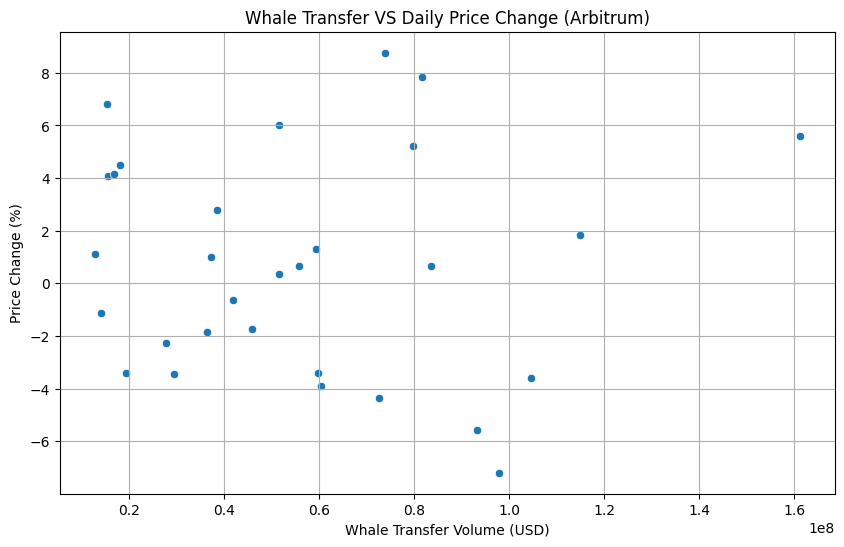

In [12]:
# scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_new, x='amount', y='price_change')
plt.title('Whale Transfer VS Daily Price Change (Arbitrum)')
plt.xlabel('Whale Transfer Volume (USD)')
plt.ylabel('Price Change (%)')
plt.grid()
plt.show()

